In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

In [3]:
df = pd.read_csv('seattle_crime.csv')
df.shape

(14268, 4)

# Seattle Crime Dataset Analysis - SPD 1.5
## Andrey Novichov - 06/06/20

14,268 entries with 4 columns

## Data Exploration

In [4]:
df.head()

,Report_Year,Census_Tract_1990,Crime_Type,Report_Year_Total
0,1996,1.0,Aggravated Assault,11
1,1996,1.0,Homicide,0
2,1996,1.0,NonResidential Burglary,41
3,1996,1.0,Property Crimes Total,430
4,1996,1.0,Rape,2


In [5]:
df['Report_Year'].unique()

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007])

In [6]:
df['Crime_Type'].unique()

array(['Aggravated Assault', 'Homicide', 'NonResidential Burglary',
       'Property Crimes Total', 'Rape', 'Residential Burglary', 'Robbery',
       'Theft', 'Vehicle Theft', 'Violent Crimes Total'], dtype=object)

In [7]:
df_nineties = df[:4920]

In [8]:
df_nineties.Report_Year.value_counts()

1999    1230
1998    1230
1997    1230
1996    1230
Name: Report_Year, dtype: int64

In [9]:
alt.Chart(df_nineties).mark_bar().encode(
    x='Report_Year:O',
    y='sum(Report_Year_Total):Q',
    color='Report_Year:N',
    column='Crime_Type:N'
)

alt.Chart(...)

## Let's look at the trends in specific crimes through all the years
See if we can see a significant increase/decrease in any of these:
- Property Crimes
- Theft
- Homicide
- Residential Burglary

**Property Crimes**

In [11]:
property_crimes = df[df['Crime_Type'] == 'Property Crimes Total']
alt.Chart(property_crimes).mark_bar().encode(
    x='Report_Year:O',
    y='sum(Report_Year_Total):Q',
    color='Report_Year:N',
    column='Crime_Type:N'
)

alt.Chart(...)

Not a big change here

**Theft**

In [12]:
theft = df[df['Crime_Type'] == 'Theft']
alt.Chart(theft).mark_bar().encode(
    x='Report_Year:O',
    y='sum(Report_Year_Total):Q',
    color='Report_Year:N',
    column='Crime_Type:N'
)

alt.Chart(...)

Theft went down a pretty big amount throughout the years! 

**Homicide**

In [13]:
homicide = df[df['Crime_Type'] == 'Homicide']
alt.Chart(homicide).mark_bar().encode(
    x='Report_Year:O',
    y='sum(Report_Year_Total):Q',
    color='Report_Year:N',
    column='Crime_Type:N'
)

alt.Chart(...)

Also went down!! Thats a good thing

**Residential Burglary**

In [14]:
residential_burglary = df[df['Crime_Type'] == 'Residential Burglary']
alt.Chart(residential_burglary).mark_bar().encode(
    x='Report_Year:O',
    y='sum(Report_Year_Total):Q',
    color='Report_Year:N',
    column='Crime_Type:N'
)

alt.Chart(...)

Residential Burglary stayed the same more or less.

## Thoughts:
- Would be useful to have another dataset on policies introduced by Seattle at these years, and changes in law enforcement/etc...

## Let's see if crime went down in general from 1996 -> 2007

In [28]:
yearly_sum = df.groupby('Report_Year')['Report_Year_Total'].sum()

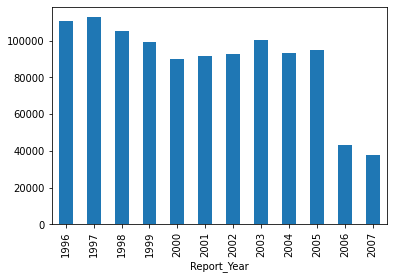

In [29]:
yearly_sum.plot(kind='bar')

In [30]:
(95108-43434)/95108

0.5433191739916726

**As we can see, crime went down a lot between 2005-2006 - 54% to be exact**

Let's look at those two years to see what changes happened

In [19]:
yr_2005_2006 = df[(df['Report_Year'] == 2005) | (df['Report_Year'] == 2006)]

In [20]:
alt.Chart(yr_2005_2006).mark_bar().encode(
    x='Report_Year:O',
    y='sum(Report_Year_Total):Q',
    color='Report_Year:N',
    column='Crime_Type:N'
)

alt.Chart(...)

In [21]:
yr_2005_2006[yr_2005_2006['Crime_Type'] == 'Property Crimes Total'].groupby(['Report_Year'])['Report_Year_Total'].sum()

Report_Year
2005    43589
Name: Report_Year_Total, dtype: int64

**We can see a huge drop in Property Crimes, where in 2006 there were 0 property crimes shown. Probably an error in data entry**

## Conclusion
- Not a really good dataset to work with, no information of what the census tract is in this scenario
- Determined that crime as a whole went down, and that specific crimes like Theft and Homicide had a significant decrease from 1996 - 2007
- Determined that Property Crimes and Theft were by far the most common crimes in every year
- 